<div class="alert alert-block alert-info">
<span style="font-size:xx-large;"><center>Solving Equations</center></span>
</div>

We are looking for solutions of the equation:
$$ \sin\left(\frac{x}{4}\right) = \frac{\sqrt{2}}{2} $$

The sinus function is periodic, so we suspect that this eqation has an inifinite number of solution.  
Let's restrain ourself on the solution(s) $x\in\left[1,5\right]$.

In order to find $x$ we need an equation of the form $f(x) = 0$

Define $f(x)$


In [1]:
import numpy as np

def f(x):
    return np.sin(x/4) - np.sqrt(2) / 2

Plot f and a horizontal line on 0 (you may use numpy.zeros)

<IPython.core.display.Javascript object>


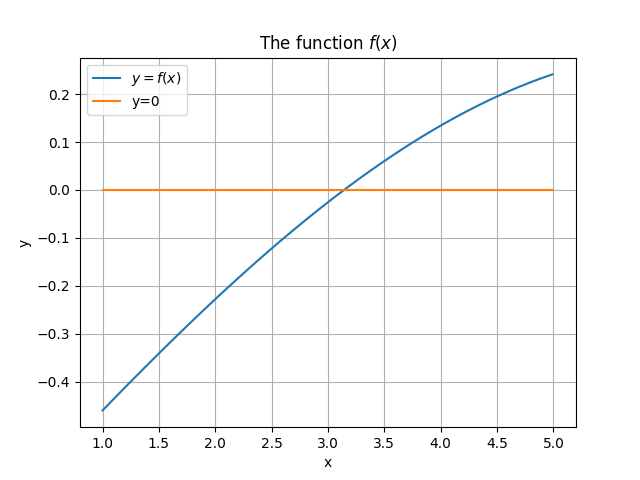

In [2]:
%matplotlib notebook
# The previous line gives a prettier graph in jupyter, this is not python

import matplotlib.pyplot as plt

x = np.arange(1., 5., 0.01)

plt.figure("My first Figure")
plt.plot(x, f(x), label="$y=f(x)$") 
plt.plot([1,5], [0, 0], label="y=0") 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('The function $f(x)$') 
plt.grid(True) 
plt.legend()
plt.show() 

Based on this graph, make a first guess on the solutions:

In [3]:
my_guess = np.pi
print(f(my_guess))

-1.1102230246251565e-16


We would prefer that the computer find the soultion by itself.  
We will see here 3 common algorithm for that.


# Bisection algorithm

<table>
    <tr>
        <td> <img src="flowchart.png" alt="Flowchart" style="width: 350px;height: 420px"/> </td>
        <td> <img src="bisection_animation.gif" alt="Animation" style="width: 550px;"/> </td>
    </tr>
</table>

Write a function `bisect(f, a, b, tol, nit)` that use this algorithm to find a solution of `f(x)` in the inteval $\left[a,b\right]$ within a tolerence `tol` or stop after `nit` iterations

You may use a `while` loop 

Please write your advancement during the resolution  
(the iteration number, the current solution and the current error)

In [4]:
def bisect(f, a, b, tol, nit):
    err = abs(b-a)
    it = 0
    c = (b+a) / 2
    while err > tol and it < nit:
        if f(a) * f(c) > 0:
            a = c
        else:
            b = c
        err = abs(b-a)
        it += 1
        c = (b+a) / 2
        print("{:3} Iterations, solution = {:5.3f} ± {:5.3f}".format(it, c, err))
        
    return c

Start with $\text{tol} = 10^{-5}$ and $\text{nit} = 5$

And play with all the arguments in order to find the solution with the best precision possible

In [5]:
sol1 = bisect(f, 1, 5, 1e-5, 5)
print(sol1)

  1 Iterations, solution = 4.000 ± 2.000
  2 Iterations, solution = 3.500 ± 1.000
  3 Iterations, solution = 3.250 ± 0.500
  4 Iterations, solution = 3.125 ± 0.250
  5 Iterations, solution = 3.188 ± 0.125
3.1875


# The fix point algorithm

<table>
    <tr>
        <td> <img src="Fix_point-flowchart.png" alt="Flowchart" style="height: 420px"/> </td>
        <td> <img src="fix_point_animation.gif" alt="Animation" style="height: 420px;"/> </td>
    </tr>
</table>

In order to find $x$ we need an equation of the form $g(x) = x$ with :
- $g(y) > y$ if $y < x$
- $g(y) < y$ if $y > x$

For exemple $g(x) = x - \left(\sin\left(\frac{x}{4}\right) - \frac{\sqrt{2}}{2}\right)$.



Define $g(x)$

In [6]:
def g(x):
    return x - f(x)

Plot `g(x)` and `x`

<IPython.core.display.Javascript object>


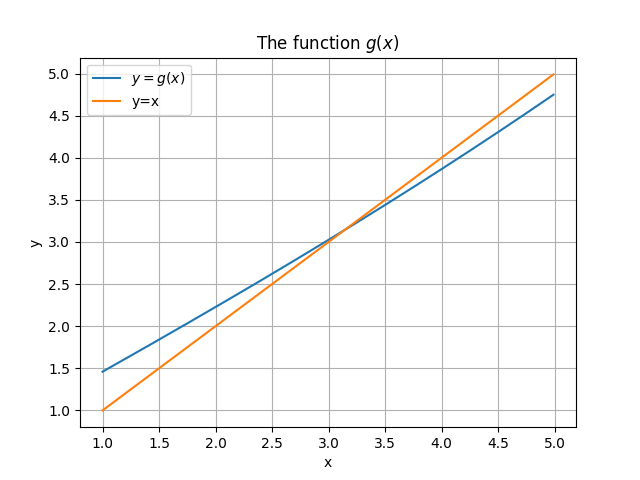

In [7]:
plt.figure("My second Figure")
plt.plot(x, g(x), label="$y=g(x)$") 
plt.plot(x, x, label="y=x") 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('The function $g(x)$') 
plt.grid(True) 
plt.legend()
plt.show() 

Write a function `FixPoint(g, x_0, tol, nit)` that apply this algorithm to find a solution within a tolerence `tol` or stop after `nit` iterations.

You may use a `while` loop 

Please write your advancement during the resolution  
(the iteration number, the current solution and the current error)

In [8]:
def FixPoint(g, x_0, tol, nit):
    gx = g(x_0)
    err = abs(x_0 - gx)
    it = 0
    while err > tol and it < nit:
        x_0 = gx
        gx = g(x_0)
        err = abs(x_0 - gx)
        it += 1
        
        print("{:3} Iterations, solution = {:5.3f} ± {:5.3f}".format(it, gx, err))

        
    return gx

Take $\text{tol} = 10^{-5}$, $\text{nit} = 5$ and $x_0 = 1.5$ and validate your function.  
Play with $\text{tol}$ and $\text{nit}$

In [9]:
sol2 = FixPoint(g, 1.5, 1e-5, 5)
print(sol2)

  1 Iterations, solution = 2.104 ± 0.263
  2 Iterations, solution = 2.309 ± 0.205
  3 Iterations, solution = 2.470 ± 0.161
  4 Iterations, solution = 2.598 ± 0.128
  5 Iterations, solution = 2.701 ± 0.102
2.7005885562957994


Write a new function `graphFixPoint(g, x_0, tol, nit)` that does exactly the same thing as your previous function,  
but also graph a plot similar to the animation.

In [10]:
def graphFixPoint(g, x_0, tol, nit):
    gx = g(x_0)
    err = abs(x_0 - gx)
    it = 0
    
    data_x = [x_0, x_0]
    data_y = [1.0, gx]
    
    while err > tol and it < nit:
        x_0 = gx
        gx = g(x_0)
        
        data_x.append(x_0)
        data_y.append(x_0)
        data_x.append(x_0)
        data_y.append(gx)
        
        err = abs(x_0 - gx)
        it += 1
        
    return gx, data_x, data_y

Apply this new function

<IPython.core.display.Javascript object>


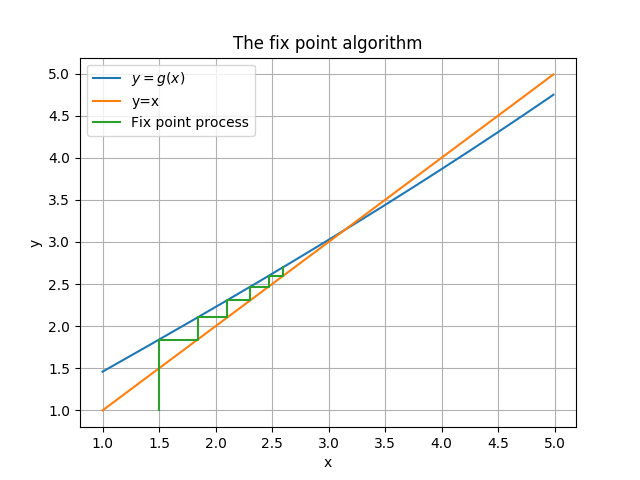

In [11]:
sol2, fixpoint_x, fixpoint_y = graphFixPoint(g, 1.5, 1e-5, 5)

plt.figure("My third Figure")
plt.plot(x, g(x), label="$y=g(x)$") 
plt.plot(x, x, label="y=x") 
plt.plot(fixpoint_x, fixpoint_y, label="Fix point process") 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('The fix point algorithm') 
plt.grid(True) 
plt.legend()
plt.show() 

Search for an alternative function `g` that converge faster (in terms of number of iterations).

Plot the result with your `graphFixPoint` function.

<IPython.core.display.Javascript object>


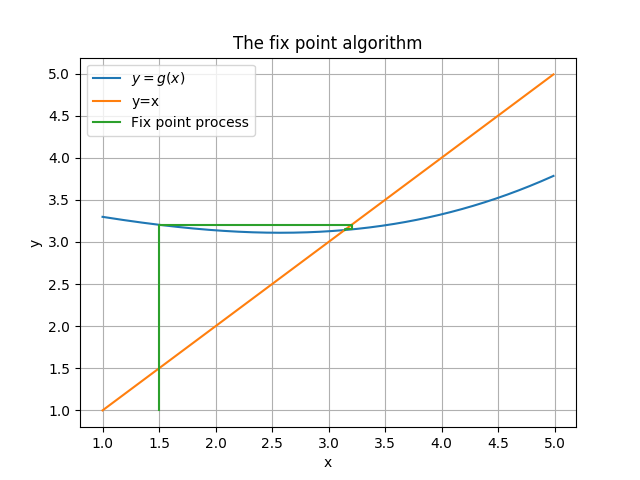

In [12]:
def g2(x):
    return x - 5*f(x)

sol3, fixpoint_x, fixpoint_y = graphFixPoint(g2, 1.5, 1e-5, 5)

plt.figure("My forth Figure")
plt.plot(x, g2(x), label="$y=g(x)$") 
plt.plot(x, x, label="y=x") 
plt.plot(fixpoint_x, fixpoint_y, label="Fix point process") 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('The fix point algorithm') 
plt.grid(True) 
plt.legend()
plt.show() 

# The newton method

<table>
    <tr>
        <td> <img src="newton-flowchart.png" alt="Flowchart" style="height: 420px"/> </td>
        <td> <img src="newton_animation.gif" alt="Animation" style="height: 420px;"/> </td>
    </tr>
</table>

We need the derivative of $f$ to apply this algorithm.  
Define this function $df(x) = f'(x)$

In [13]:
def df(x):
    return np.cos(x/4)/4

Write a function `newton(f, df, x0, tol, nit)` that use this algorithm to find a solution of `f(x)` starting with `x_0` within a tolerence `tol` or stop after `nit` iterations

You may use a `while` loop, and define a function `df(x)`

Please write your advancement during the resolution  
(the iteration number, the current solution and the current error)

In [14]:
def newton(f, df, x_0, tol, nit):
    fxi = f(x_0)
    dfxi = df(x_0)
    x_new = x_0 - fxi / dfxi

    err = abs(x_0 - x_new)
    it = 0
    while err > tol and it < nit:
        x_0 = x_new
        fxi = f(x_0)
        dfxi = df(x_0)
        x_new = x_0 - fxi / dfxi
        
        err = abs(x_0 - x_new)
        it += 1
        
        print("{:3} Iterations, solution = {:5.3f} ± {:5.3f}".format(it, x_new, err))

        
    return x_new

Take $\text{tol} = 10^{-5}$, $\text{nit} = 5$ and $x_0 = 5$ and validate your function.  
Play with $\text{tol}$ and $\text{nit}$

In [15]:
sol3 = newton(f, df, 5, 1e-5, 5)
print(sol3)

  1 Iterations, solution = 3.028 ± 1.096
  2 Iterations, solution = 3.140 ± 0.112
  3 Iterations, solution = 3.142 ± 0.002
  4 Iterations, solution = 3.142 ± 0.000
3.141592653589783


Write a new function `graphNewton(f, df, x_0, tol, nit)` that does exactly the same thing as your previous function,  
but also graph a plot similar to the fix point animation.

In [16]:
def graphNewton(f, df, x_0, tol, nit):
    fxi = f(x_0)
    dfxi = df(x_0)
    x_new = x_0 - fxi / dfxi
    
    data_x = [x_0, x_0, x_new]
    data_y = [0, fxi, 0]
    
    err = abs(x_0 - x_new)
    it = 0
    while err > tol and it < nit:
        x_0 = x_new
        fxi = f(x_0)
        dfxi = df(x_0)
        x_new = x_0 - fxi / dfxi
        
        data_x.append(x_0)
        data_y.append(fxi)
        data_x.append(x_new)
        data_y.append(0.)
        
        err = abs(x_0 - x_new)
        it += 1
        
    return x_new, data_x, data_y



Try different values of $x_0$  

<IPython.core.display.Javascript object>


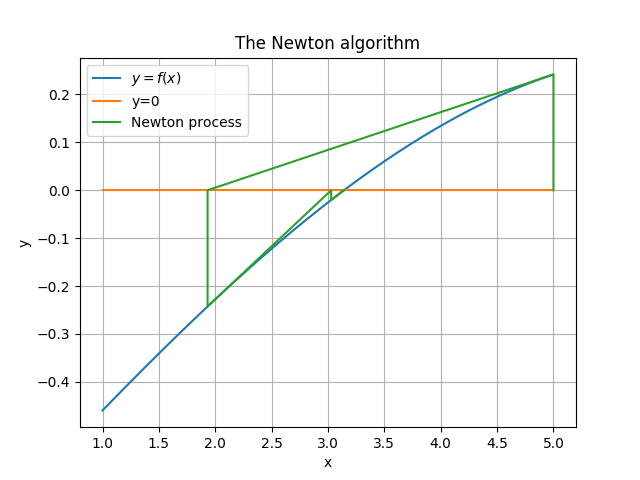

In [17]:
sol3, newton_x, newton_y = graphNewton(f, df, 5, 1e-5, 5)

plt.figure("My fifth Figure")
plt.plot(x, f(x), label="$y=f(x)$") 
plt.plot([1,5],[0,0], label="y=0") 
plt.plot(newton_x, newton_y, label="Newton process") 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('The Newton algorithm') 
plt.grid(True) 
plt.legend()
plt.show() 

What happen with $x_0 = -4$ ?

<IPython.core.display.Javascript object>


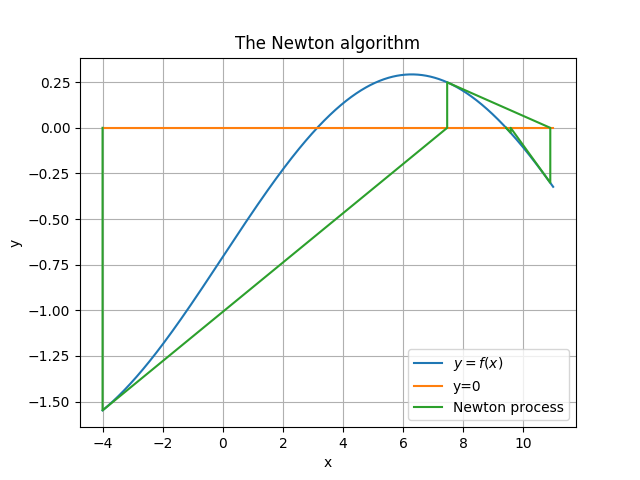

In [18]:
sol3, newton_x, newton_y = graphNewton(f, df, -4, 1e-5, 5)

x_large = np.arange(-4., 11., 0.01)

plt.figure("My sixth Figure")
plt.plot(x_large, f(x_large), label="$y=f(x)$") 
plt.plot([-4,11],[0,0], label="y=0") 
plt.plot(newton_x, newton_y, label="Newton process") 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('The Newton algorithm') 
plt.grid(True) 
plt.legend()
plt.show() 

Write a new version of the algorithm, with a new under relaxed factor $\alpha$:  
i.e. : replacing $x_i = x_\text{new}$ by $x_i = \alpha x_\text{new} + (1-\alpha)x_i$

In [19]:
def graphNewtonalpha(f, df, x_0, tol, nit, α):
    fxi = f(x_0)
    dfxi = df(x_0)
    x_new = x_0 - fxi / dfxi
    
    data_x = [x_0, x_0]
    data_y = [0, fxi]
    
    err = abs(x_0 - x_new)
    it = 0
    while err > tol and it < nit:
        x_0 = α * x_new + (1 - α) * x_0
        fxi = f(x_0)
        dfxi = df(x_0)
        x_new = x_0 - fxi / dfxi
        
        data_x.append(x_0)
        data_y.append(0.)
        data_x.append(x_0)
        data_y.append(fxi)
        
        err = abs(x_0 - x_new)
        it += 1
        
    x_new = α * x_new + (1 - α) * x_0
    data_x.append(x_new)
    data_y.append(0.) 
        
    return x_new, data_x, data_y



Try it with different values of $\alpha \in \left]0,1\right]$

<IPython.core.display.Javascript object>


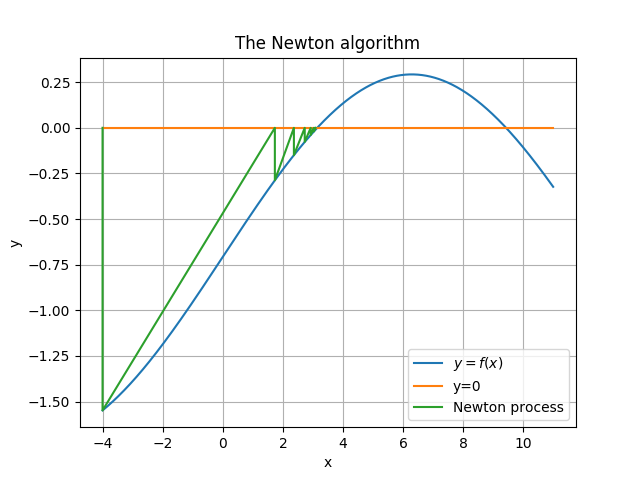

In [20]:
sol3, newton_x, newton_y = graphNewtonalpha(f, df, -4, 1e-5, 5, 0.5)

x_large = np.arange(-4., 11., 0.01)

plt.figure("My seventh Figure")
plt.plot(x_large, f(x_large), label="$y=f(x)$") 
plt.plot([-4,11],[0,0], label="y=0") 
plt.plot(newton_x, newton_y, label="Newton process") 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('The Newton algorithm') 
plt.grid(True) 
plt.legend()
plt.show() 

# Scipy

Usually you don't need to write yourself all the algorithms, the python community did that for you !

For exemple you might have used [scipy](https://docs.scipy.org/doc/scipy/reference/optimize.html).

Plot the evolution of the error as a function of the number of iteration for your three methods and brentq from scipy.

You might want to set `tol` as low as possible, and change the `nit` parameter for each point of the curve


  1 Iterations, solution = 4.000 ± 2.000
  1 Iterations, solution = 2.104 ± 0.263
  1 Iterations, solution = 3.028 ± 1.096
  1 Iterations, solution = 4.000 ± 2.000
  2 Iterations, solution = 3.500 ± 1.000
  1 Iterations, solution = 2.104 ± 0.263
  2 Iterations, solution = 2.309 ± 0.205
  1 Iterations, solution = 3.028 ± 1.096
  2 Iterations, solution = 3.140 ± 0.112
  1 Iterations, solution = 4.000 ± 2.000
  2 Iterations, solution = 3.500 ± 1.000
  3 Iterations, solution = 3.250 ± 0.500
  1 Iterations, solution = 2.104 ± 0.263
  2 Iterations, solution = 2.309 ± 0.205
  3 Iterations, solution = 2.470 ± 0.161
  1 Iterations, solution = 3.028 ± 1.096
  2 Iterations, solution = 3.140 ± 0.112
  3 Iterations, solution = 3.142 ± 0.002
  1 Iterations, solution = 4.000 ± 2.000
  2 Iterations, solution = 3.500 ± 1.000
  3 Iterations, solution = 3.250 ± 0.500
  4 Iterations, solution = 3.125 ± 0.250
  1 Iterations, solution = 2.104 ± 0.263
  2 Iterations, solution = 2.309 ± 0.205
  3 Iterations, 

  3 Iterations, solution = 3.250 ± 0.500
  4 Iterations, solution = 3.125 ± 0.250
  5 Iterations, solution = 3.188 ± 0.125
  6 Iterations, solution = 3.156 ± 0.062
  7 Iterations, solution = 3.141 ± 0.031
  8 Iterations, solution = 3.148 ± 0.016
  9 Iterations, solution = 3.145 ± 0.008
 10 Iterations, solution = 3.143 ± 0.004
 11 Iterations, solution = 3.142 ± 0.002
 12 Iterations, solution = 3.141 ± 0.001
 13 Iterations, solution = 3.141 ± 0.000
 14 Iterations, solution = 3.141 ± 0.000
 15 Iterations, solution = 3.142 ± 0.000
 16 Iterations, solution = 3.142 ± 0.000
 17 Iterations, solution = 3.142 ± 0.000
 18 Iterations, solution = 3.142 ± 0.000
 19 Iterations, solution = 3.142 ± 0.000
 20 Iterations, solution = 3.142 ± 0.000
 21 Iterations, solution = 3.142 ± 0.000
 22 Iterations, solution = 3.142 ± 0.000
 23 Iterations, solution = 3.142 ± 0.000
 24 Iterations, solution = 3.142 ± 0.000
 25 Iterations, solution = 3.142 ± 0.000
 26 Iterations, solution = 3.142 ± 0.000
 27 Iterations, 

 37 Iterations, solution = 3.141 ± 0.000
 38 Iterations, solution = 3.141 ± 0.000
 39 Iterations, solution = 3.141 ± 0.000
 40 Iterations, solution = 3.141 ± 0.000
 41 Iterations, solution = 3.141 ± 0.000
 42 Iterations, solution = 3.141 ± 0.000
 43 Iterations, solution = 3.141 ± 0.000
 44 Iterations, solution = 3.141 ± 0.000
 45 Iterations, solution = 3.141 ± 0.000
 46 Iterations, solution = 3.141 ± 0.000
 47 Iterations, solution = 3.141 ± 0.000
 48 Iterations, solution = 3.141 ± 0.000
 49 Iterations, solution = 3.142 ± 0.000
 50 Iterations, solution = 3.142 ± 0.000
 51 Iterations, solution = 3.142 ± 0.000
 52 Iterations, solution = 3.142 ± 0.000
 53 Iterations, solution = 3.142 ± 0.000
 54 Iterations, solution = 3.142 ± 0.000
 55 Iterations, solution = 3.142 ± 0.000
 56 Iterations, solution = 3.142 ± 0.000
 57 Iterations, solution = 3.142 ± 0.000
 58 Iterations, solution = 3.142 ± 0.000
 59 Iterations, solution = 3.142 ± 0.000
 60 Iterations, solution = 3.142 ± 0.000
 61 Iterations, 

 37 Iterations, solution = 3.141 ± 0.000
 38 Iterations, solution = 3.141 ± 0.000
 39 Iterations, solution = 3.141 ± 0.000
 40 Iterations, solution = 3.141 ± 0.000
 41 Iterations, solution = 3.141 ± 0.000
 42 Iterations, solution = 3.141 ± 0.000
 43 Iterations, solution = 3.141 ± 0.000
 44 Iterations, solution = 3.141 ± 0.000
 45 Iterations, solution = 3.141 ± 0.000
 46 Iterations, solution = 3.141 ± 0.000
 47 Iterations, solution = 3.141 ± 0.000
 48 Iterations, solution = 3.141 ± 0.000
 49 Iterations, solution = 3.142 ± 0.000
 50 Iterations, solution = 3.142 ± 0.000
 51 Iterations, solution = 3.142 ± 0.000
 52 Iterations, solution = 3.142 ± 0.000
 53 Iterations, solution = 3.142 ± 0.000
 54 Iterations, solution = 3.142 ± 0.000
 55 Iterations, solution = 3.142 ± 0.000
 56 Iterations, solution = 3.142 ± 0.000
 57 Iterations, solution = 3.142 ± 0.000
 58 Iterations, solution = 3.142 ± 0.000
 59 Iterations, solution = 3.142 ± 0.000
 60 Iterations, solution = 3.142 ± 0.000
 61 Iterations, 

 45 Iterations, solution = 3.141 ± 0.000
 46 Iterations, solution = 3.141 ± 0.000
 47 Iterations, solution = 3.141 ± 0.000
 48 Iterations, solution = 3.141 ± 0.000
 49 Iterations, solution = 3.142 ± 0.000
 50 Iterations, solution = 3.142 ± 0.000
 51 Iterations, solution = 3.142 ± 0.000
 52 Iterations, solution = 3.142 ± 0.000
 53 Iterations, solution = 3.142 ± 0.000
 54 Iterations, solution = 3.142 ± 0.000
 55 Iterations, solution = 3.142 ± 0.000
 56 Iterations, solution = 3.142 ± 0.000
 57 Iterations, solution = 3.142 ± 0.000
 58 Iterations, solution = 3.142 ± 0.000
 59 Iterations, solution = 3.142 ± 0.000
 60 Iterations, solution = 3.142 ± 0.000
 61 Iterations, solution = 3.142 ± 0.000
 62 Iterations, solution = 3.142 ± 0.000
 63 Iterations, solution = 3.142 ± 0.000
 64 Iterations, solution = 3.142 ± 0.000
 65 Iterations, solution = 3.142 ± 0.000
 66 Iterations, solution = 3.142 ± 0.000
 67 Iterations, solution = 3.142 ± 0.000
 68 Iterations, solution = 3.142 ± 0.000
 69 Iterations, 

 96 Iterations, solution = 3.142 ± 0.000
 97 Iterations, solution = 3.142 ± 0.000
 98 Iterations, solution = 3.142 ± 0.000
 99 Iterations, solution = 3.142 ± 0.000
100 Iterations, solution = 3.142 ± 0.000
101 Iterations, solution = 3.142 ± 0.000
102 Iterations, solution = 3.142 ± 0.000
103 Iterations, solution = 3.142 ± 0.000
104 Iterations, solution = 3.142 ± 0.000
105 Iterations, solution = 3.142 ± 0.000
  1 Iterations, solution = 3.028 ± 1.096
  2 Iterations, solution = 3.140 ± 0.112
  3 Iterations, solution = 3.142 ± 0.002
  4 Iterations, solution = 3.142 ± 0.000
  5 Iterations, solution = 3.142 ± 0.000
  6 Iterations, solution = 3.142 ± 0.000
  1 Iterations, solution = 4.000 ± 2.000
  2 Iterations, solution = 3.500 ± 1.000
  3 Iterations, solution = 3.250 ± 0.500
  4 Iterations, solution = 3.125 ± 0.250
  5 Iterations, solution = 3.188 ± 0.125
  6 Iterations, solution = 3.156 ± 0.062
  7 Iterations, solution = 3.141 ± 0.031
  8 Iterations, solution = 3.148 ± 0.016
  9 Iterations, 

 99 Iterations, solution = 3.142 ± 0.000
100 Iterations, solution = 3.142 ± 0.000
101 Iterations, solution = 3.142 ± 0.000
102 Iterations, solution = 3.142 ± 0.000
103 Iterations, solution = 3.142 ± 0.000
104 Iterations, solution = 3.142 ± 0.000
105 Iterations, solution = 3.142 ± 0.000
106 Iterations, solution = 3.142 ± 0.000
107 Iterations, solution = 3.142 ± 0.000
108 Iterations, solution = 3.142 ± 0.000
109 Iterations, solution = 3.142 ± 0.000
110 Iterations, solution = 3.142 ± 0.000
111 Iterations, solution = 3.142 ± 0.000
112 Iterations, solution = 3.142 ± 0.000
113 Iterations, solution = 3.142 ± 0.000
114 Iterations, solution = 3.142 ± 0.000
115 Iterations, solution = 3.142 ± 0.000
116 Iterations, solution = 3.142 ± 0.000
  1 Iterations, solution = 3.028 ± 1.096
  2 Iterations, solution = 3.140 ± 0.112
  3 Iterations, solution = 3.142 ± 0.002
  4 Iterations, solution = 3.142 ± 0.000
  5 Iterations, solution = 3.142 ± 0.000
  6 Iterations, solution = 3.142 ± 0.000
  1 Iterations, 

118 Iterations, solution = 3.142 ± 0.000
119 Iterations, solution = 3.142 ± 0.000
120 Iterations, solution = 3.142 ± 0.000
121 Iterations, solution = 3.142 ± 0.000
122 Iterations, solution = 3.142 ± 0.000
123 Iterations, solution = 3.142 ± 0.000
124 Iterations, solution = 3.142 ± 0.000
125 Iterations, solution = 3.142 ± 0.000
126 Iterations, solution = 3.142 ± 0.000
  1 Iterations, solution = 3.028 ± 1.096
  2 Iterations, solution = 3.140 ± 0.112
  3 Iterations, solution = 3.142 ± 0.002
  4 Iterations, solution = 3.142 ± 0.000
  5 Iterations, solution = 3.142 ± 0.000
  6 Iterations, solution = 3.142 ± 0.000
  1 Iterations, solution = 4.000 ± 2.000
  2 Iterations, solution = 3.500 ± 1.000
  3 Iterations, solution = 3.250 ± 0.500
  4 Iterations, solution = 3.125 ± 0.250
  5 Iterations, solution = 3.188 ± 0.125
  6 Iterations, solution = 3.156 ± 0.062
  7 Iterations, solution = 3.141 ± 0.031
  8 Iterations, solution = 3.148 ± 0.016
  9 Iterations, solution = 3.145 ± 0.008
 10 Iterations, 

 74 Iterations, solution = 3.142 ± 0.000
 75 Iterations, solution = 3.142 ± 0.000
 76 Iterations, solution = 3.142 ± 0.000
 77 Iterations, solution = 3.142 ± 0.000
 78 Iterations, solution = 3.142 ± 0.000
 79 Iterations, solution = 3.142 ± 0.000
 80 Iterations, solution = 3.142 ± 0.000
 81 Iterations, solution = 3.142 ± 0.000
 82 Iterations, solution = 3.142 ± 0.000
 83 Iterations, solution = 3.142 ± 0.000
 84 Iterations, solution = 3.142 ± 0.000
 85 Iterations, solution = 3.142 ± 0.000
 86 Iterations, solution = 3.142 ± 0.000
 87 Iterations, solution = 3.142 ± 0.000
 88 Iterations, solution = 3.142 ± 0.000
 89 Iterations, solution = 3.142 ± 0.000
 90 Iterations, solution = 3.142 ± 0.000
 91 Iterations, solution = 3.142 ± 0.000
 92 Iterations, solution = 3.142 ± 0.000
 93 Iterations, solution = 3.142 ± 0.000
 94 Iterations, solution = 3.142 ± 0.000
 95 Iterations, solution = 3.142 ± 0.000
 96 Iterations, solution = 3.142 ± 0.000
 97 Iterations, solution = 3.142 ± 0.000
 98 Iterations, 

  5 Iterations, solution = 3.142 ± 0.000
  6 Iterations, solution = 3.142 ± 0.000
  1 Iterations, solution = 4.000 ± 2.000
  2 Iterations, solution = 3.500 ± 1.000
  3 Iterations, solution = 3.250 ± 0.500
  4 Iterations, solution = 3.125 ± 0.250
  5 Iterations, solution = 3.188 ± 0.125
  6 Iterations, solution = 3.156 ± 0.062
  7 Iterations, solution = 3.141 ± 0.031
  8 Iterations, solution = 3.148 ± 0.016
  9 Iterations, solution = 3.145 ± 0.008
 10 Iterations, solution = 3.143 ± 0.004
 11 Iterations, solution = 3.142 ± 0.002
 12 Iterations, solution = 3.141 ± 0.001
 13 Iterations, solution = 3.141 ± 0.000
 14 Iterations, solution = 3.141 ± 0.000
 15 Iterations, solution = 3.142 ± 0.000
 16 Iterations, solution = 3.142 ± 0.000
 17 Iterations, solution = 3.142 ± 0.000
 18 Iterations, solution = 3.142 ± 0.000
 19 Iterations, solution = 3.142 ± 0.000
 20 Iterations, solution = 3.142 ± 0.000
 21 Iterations, solution = 3.142 ± 0.000
 22 Iterations, solution = 3.142 ± 0.000
 23 Iterations, 

 80 Iterations, solution = 3.142 ± 0.000
 81 Iterations, solution = 3.142 ± 0.000
 82 Iterations, solution = 3.142 ± 0.000
 83 Iterations, solution = 3.142 ± 0.000
 84 Iterations, solution = 3.142 ± 0.000
 85 Iterations, solution = 3.142 ± 0.000
 86 Iterations, solution = 3.142 ± 0.000
 87 Iterations, solution = 3.142 ± 0.000
 88 Iterations, solution = 3.142 ± 0.000
 89 Iterations, solution = 3.142 ± 0.000
 90 Iterations, solution = 3.142 ± 0.000
 91 Iterations, solution = 3.142 ± 0.000
 92 Iterations, solution = 3.142 ± 0.000
 93 Iterations, solution = 3.142 ± 0.000
 94 Iterations, solution = 3.142 ± 0.000
 95 Iterations, solution = 3.142 ± 0.000
 96 Iterations, solution = 3.142 ± 0.000
 97 Iterations, solution = 3.142 ± 0.000
 98 Iterations, solution = 3.142 ± 0.000
 99 Iterations, solution = 3.142 ± 0.000
100 Iterations, solution = 3.142 ± 0.000
101 Iterations, solution = 3.142 ± 0.000
102 Iterations, solution = 3.142 ± 0.000
103 Iterations, solution = 3.142 ± 0.000
104 Iterations, 

 32 Iterations, solution = 3.139 ± 0.000
 33 Iterations, solution = 3.140 ± 0.000
 34 Iterations, solution = 3.140 ± 0.000
 35 Iterations, solution = 3.140 ± 0.000
 36 Iterations, solution = 3.141 ± 0.000
 37 Iterations, solution = 3.141 ± 0.000
 38 Iterations, solution = 3.141 ± 0.000
 39 Iterations, solution = 3.141 ± 0.000
 40 Iterations, solution = 3.141 ± 0.000
 41 Iterations, solution = 3.141 ± 0.000
 42 Iterations, solution = 3.141 ± 0.000
 43 Iterations, solution = 3.141 ± 0.000
 44 Iterations, solution = 3.141 ± 0.000
 45 Iterations, solution = 3.141 ± 0.000
 46 Iterations, solution = 3.141 ± 0.000
 47 Iterations, solution = 3.141 ± 0.000
 48 Iterations, solution = 3.141 ± 0.000
 49 Iterations, solution = 3.142 ± 0.000
 50 Iterations, solution = 3.142 ± 0.000
 51 Iterations, solution = 3.142 ± 0.000
 52 Iterations, solution = 3.142 ± 0.000
 53 Iterations, solution = 3.142 ± 0.000
 54 Iterations, solution = 3.142 ± 0.000
 55 Iterations, solution = 3.142 ± 0.000
 56 Iterations, 

  4 Iterations, solution = 3.142 ± 0.000
  5 Iterations, solution = 3.142 ± 0.000
  6 Iterations, solution = 3.142 ± 0.000
  1 Iterations, solution = 4.000 ± 2.000
  2 Iterations, solution = 3.500 ± 1.000
  3 Iterations, solution = 3.250 ± 0.500
  4 Iterations, solution = 3.125 ± 0.250
  5 Iterations, solution = 3.188 ± 0.125
  6 Iterations, solution = 3.156 ± 0.062
  7 Iterations, solution = 3.141 ± 0.031
  8 Iterations, solution = 3.148 ± 0.016
  9 Iterations, solution = 3.145 ± 0.008
 10 Iterations, solution = 3.143 ± 0.004
 11 Iterations, solution = 3.142 ± 0.002
 12 Iterations, solution = 3.141 ± 0.001
 13 Iterations, solution = 3.141 ± 0.000
 14 Iterations, solution = 3.141 ± 0.000
 15 Iterations, solution = 3.142 ± 0.000
 16 Iterations, solution = 3.142 ± 0.000
 17 Iterations, solution = 3.142 ± 0.000
 18 Iterations, solution = 3.142 ± 0.000
 19 Iterations, solution = 3.142 ± 0.000
 20 Iterations, solution = 3.142 ± 0.000
 21 Iterations, solution = 3.142 ± 0.000
 22 Iterations, 

 33 Iterations, solution = 3.142 ± 0.000
 34 Iterations, solution = 3.142 ± 0.000
 35 Iterations, solution = 3.142 ± 0.000
 36 Iterations, solution = 3.142 ± 0.000
 37 Iterations, solution = 3.142 ± 0.000
 38 Iterations, solution = 3.142 ± 0.000
 39 Iterations, solution = 3.142 ± 0.000
 40 Iterations, solution = 3.142 ± 0.000
 41 Iterations, solution = 3.142 ± 0.000
 42 Iterations, solution = 3.142 ± 0.000
 43 Iterations, solution = 3.142 ± 0.000
 44 Iterations, solution = 3.142 ± 0.000
 45 Iterations, solution = 3.142 ± 0.000
 46 Iterations, solution = 3.142 ± 0.000
 47 Iterations, solution = 3.142 ± 0.000
 48 Iterations, solution = 3.142 ± 0.000
 49 Iterations, solution = 3.142 ± 0.000
 50 Iterations, solution = 3.142 ± 0.000
 51 Iterations, solution = 3.142 ± 0.000
 52 Iterations, solution = 3.142 ± 0.000
 53 Iterations, solution = 3.142 ± 0.000
 54 Iterations, solution = 3.142 ± 0.000
 55 Iterations, solution = 3.142 ± 0.000
 56 Iterations, solution = 3.142 ± 0.000
 57 Iterations, 

 41 Iterations, solution = 3.141 ± 0.000
 42 Iterations, solution = 3.141 ± 0.000
 43 Iterations, solution = 3.141 ± 0.000
 44 Iterations, solution = 3.141 ± 0.000
 45 Iterations, solution = 3.141 ± 0.000
 46 Iterations, solution = 3.141 ± 0.000
 47 Iterations, solution = 3.141 ± 0.000
 48 Iterations, solution = 3.141 ± 0.000
 49 Iterations, solution = 3.142 ± 0.000
 50 Iterations, solution = 3.142 ± 0.000
 51 Iterations, solution = 3.142 ± 0.000
 52 Iterations, solution = 3.142 ± 0.000
 53 Iterations, solution = 3.142 ± 0.000
 54 Iterations, solution = 3.142 ± 0.000
 55 Iterations, solution = 3.142 ± 0.000
 56 Iterations, solution = 3.142 ± 0.000
 57 Iterations, solution = 3.142 ± 0.000
 58 Iterations, solution = 3.142 ± 0.000
 59 Iterations, solution = 3.142 ± 0.000
 60 Iterations, solution = 3.142 ± 0.000
 61 Iterations, solution = 3.142 ± 0.000
 62 Iterations, solution = 3.142 ± 0.000
 63 Iterations, solution = 3.142 ± 0.000
 64 Iterations, solution = 3.142 ± 0.000
 65 Iterations, 

146 Iterations, solution = 3.142 ± 0.000
147 Iterations, solution = 3.142 ± 0.000
148 Iterations, solution = 3.142 ± 0.000
149 Iterations, solution = 3.142 ± 0.000
150 Iterations, solution = 3.142 ± 0.000
151 Iterations, solution = 3.142 ± 0.000
152 Iterations, solution = 3.142 ± 0.000
153 Iterations, solution = 3.142 ± 0.000
154 Iterations, solution = 3.142 ± 0.000
155 Iterations, solution = 3.142 ± 0.000
156 Iterations, solution = 3.142 ± 0.000
157 Iterations, solution = 3.142 ± 0.000
158 Iterations, solution = 3.142 ± 0.000
159 Iterations, solution = 3.142 ± 0.000
160 Iterations, solution = 3.142 ± 0.000
161 Iterations, solution = 3.142 ± 0.000
162 Iterations, solution = 3.142 ± 0.000
163 Iterations, solution = 3.142 ± 0.000
164 Iterations, solution = 3.142 ± 0.000
165 Iterations, solution = 3.142 ± 0.000
166 Iterations, solution = 3.142 ± 0.000
167 Iterations, solution = 3.142 ± 0.000
168 Iterations, solution = 3.142 ± 0.000
169 Iterations, solution = 3.142 ± 0.000
170 Iterations, 

 21 Iterations, solution = 3.142 ± 0.000
 22 Iterations, solution = 3.142 ± 0.000
 23 Iterations, solution = 3.142 ± 0.000
 24 Iterations, solution = 3.142 ± 0.000
 25 Iterations, solution = 3.142 ± 0.000
 26 Iterations, solution = 3.142 ± 0.000
 27 Iterations, solution = 3.142 ± 0.000
 28 Iterations, solution = 3.142 ± 0.000
 29 Iterations, solution = 3.142 ± 0.000
 30 Iterations, solution = 3.142 ± 0.000
 31 Iterations, solution = 3.142 ± 0.000
 32 Iterations, solution = 3.142 ± 0.000
 33 Iterations, solution = 3.142 ± 0.000
 34 Iterations, solution = 3.142 ± 0.000
 35 Iterations, solution = 3.142 ± 0.000
 36 Iterations, solution = 3.142 ± 0.000
 37 Iterations, solution = 3.142 ± 0.000
 38 Iterations, solution = 3.142 ± 0.000
 39 Iterations, solution = 3.142 ± 0.000
 40 Iterations, solution = 3.142 ± 0.000
 41 Iterations, solution = 3.142 ± 0.000
 42 Iterations, solution = 3.142 ± 0.000
 43 Iterations, solution = 3.142 ± 0.000
 44 Iterations, solution = 3.142 ± 0.000
 45 Iterations, 

<IPython.core.display.Javascript object>


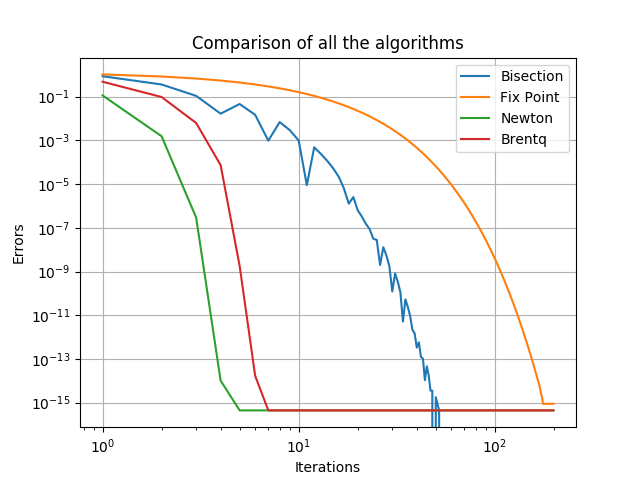

In [21]:
from scipy.optimize import brentq

errors_bisection = []
errors_fix_point = []
errors_newton = []
errors_brentq = []

its = range(1,200)

for it in its:
    sol_bis = bisect(f, 1, 5, 1e-50, it)
    errors_bisection.append(abs(np.pi - sol_bis))
    
    sol_fix = FixPoint(g, 1.5, 1e-50, it)
    errors_fix_point.append(abs(np.pi - sol_fix))
    
    sol_newton = newton(f, df, 5, 1e-50, it)
    errors_newton.append(abs(np.pi - sol_newton))
    
    sol_brentq = brentq(f, 1, 5, xtol=1e-50, maxiter=it, disp=False)
    errors_brentq.append(abs(np.pi - sol_brentq))
    
plt.figure("My heigth Figure")
plt.loglog(its, errors_bisection, label="Bisection") 
plt.loglog(its, errors_fix_point, label="Fix Point")
plt.loglog(its, errors_newton, label="Newton") 
plt.loglog(its, errors_brentq, label="Brentq") 
plt.xlabel('Iterations') 
plt.ylabel('Errors') 
plt.title('Comparison of all the algorithms') 
plt.grid(True) 
plt.legend()
plt.show() 

<div class="alert alert-block alert-danger">
<span style="font-size:xx-large;">
    <center>
        **Do not forget**
    </center>
</span>
</div>

Once all cells have been **filled** and **executed**, save this document as a pdf file (by printing it)  
Check that everything is present on the produced pdf  
Send **the pdf AND the notebook** to me via Universitice  
This will be used to evaluate you.

<div class="alert alert-block alert-info">
<span style="font-size:xx-large;"><center>That's it for today !</center></span>
</div>